# AgriWeather_EDA

- ```'../data/Data Collection/AgriWether.ipynb'``` 파일에서 수집한 데이터를 포함하여 EDA하는 파일

In [1]:
import sys
import os
import time
from glob import glob
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

# DC
import requests
from bs4 import BeautifulSoup

# about file format
import xmltodict


sys.path.append("../Import")
# 'auth' is included in gitignore.
from auth import authkey
from definitions import crop_list, crop_list2
authkey = authkey["FmlandWthrInfo_dec"]
from modul import reduce_mem_usage

root_path = "../"
data_path = f"{root_path}data/"

# 파일 불러오기

In [2]:
df_raw = pd.read_csv(f"{data_path}AgriWeather.csv")

print("┌▣ df_raw.shape")
print(df_raw.shape)

print("\n\n┌▣ df_raw.info()")
print(df_raw.info())

print("\n\n┌▣ df_raw.head()")
display(df_raw.head())

┌▣ df_raw.shape
(23368, 9)


┌▣ df_raw.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YMD                      23368 non-null  object 
 1   Crop_Name                23368 non-null  object 
 2   DayAvg_Temperature       23368 non-null  float64
 3   DayDiff_Temperature      23368 non-null  float64
 4   DayAvg_RelativeHumidity  23368 non-null  float64
 5   DaySum_Rainfall          23368 non-null  float64
 6   DayAvg_WindSpeed         23368 non-null  float64
 7   DaySum_Sunshine          23368 non-null  float64
 8   Warning_Count            23368 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB
None


┌▣ df_raw.head()


,YMD,Crop_Name,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-01,감자,-3.750,9.250,44.000,0.750,2.250,3.500,0.000
1,2005-01-01,고구마,-3.000,8.000,0.000,0.000,2.000,0.000,0.000
2,2005-01-01,깻잎,-3.500,8.000,29.000,0.000,1.500,4.000,0.000
3,2005-01-01,마늘,-1.200,7.200,31.400,1.400,2.200,2.800,0.000
4,2005-01-02,감자,-0.250,10.750,48.250,0.000,1.750,0.500,0.000


# 단변량 비시각화 분석

In [3]:
# 분석할 데이터 할당
df = df_raw.copy()
df = reduce_mem_usage(df)
print(df.shape)

Mem. usage decreased to  0.67 Mb (58.3% reduction)
(23368, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YMD                      23368 non-null  object 
 1   Crop_Name                23368 non-null  object 
 2   DayAvg_Temperature       23368 non-null  float16
 3   DayDiff_Temperature      23368 non-null  float16
 4   DayAvg_RelativeHumidity  23368 non-null  float16
 5   DaySum_Rainfall          23368 non-null  float16
 6   DayAvg_WindSpeed         23368 non-null  float16
 7   DaySum_Sunshine          23368 non-null  float16
 8   Warning_Count            23368 non-null  float16
dtypes: float16(7), object(2)
memory usage: 684.7+ KB


# 함수 구현

In [212]:
def AgriMarket_EDA(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_w[df_w['Product']==product]['Y']) > end) | (max(df_w[df_w['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_w[(df_w['Product']==product) & (df_w['Y'] >= start) & (df_w['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_r[df_r['Product']==product]['Y']) > end) | (max(df_r[df_r['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_r[(df_r['Product']==product) & (df_r['Y'] >= start) & (df_r['Y'] <= end)].groupby(['YMD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

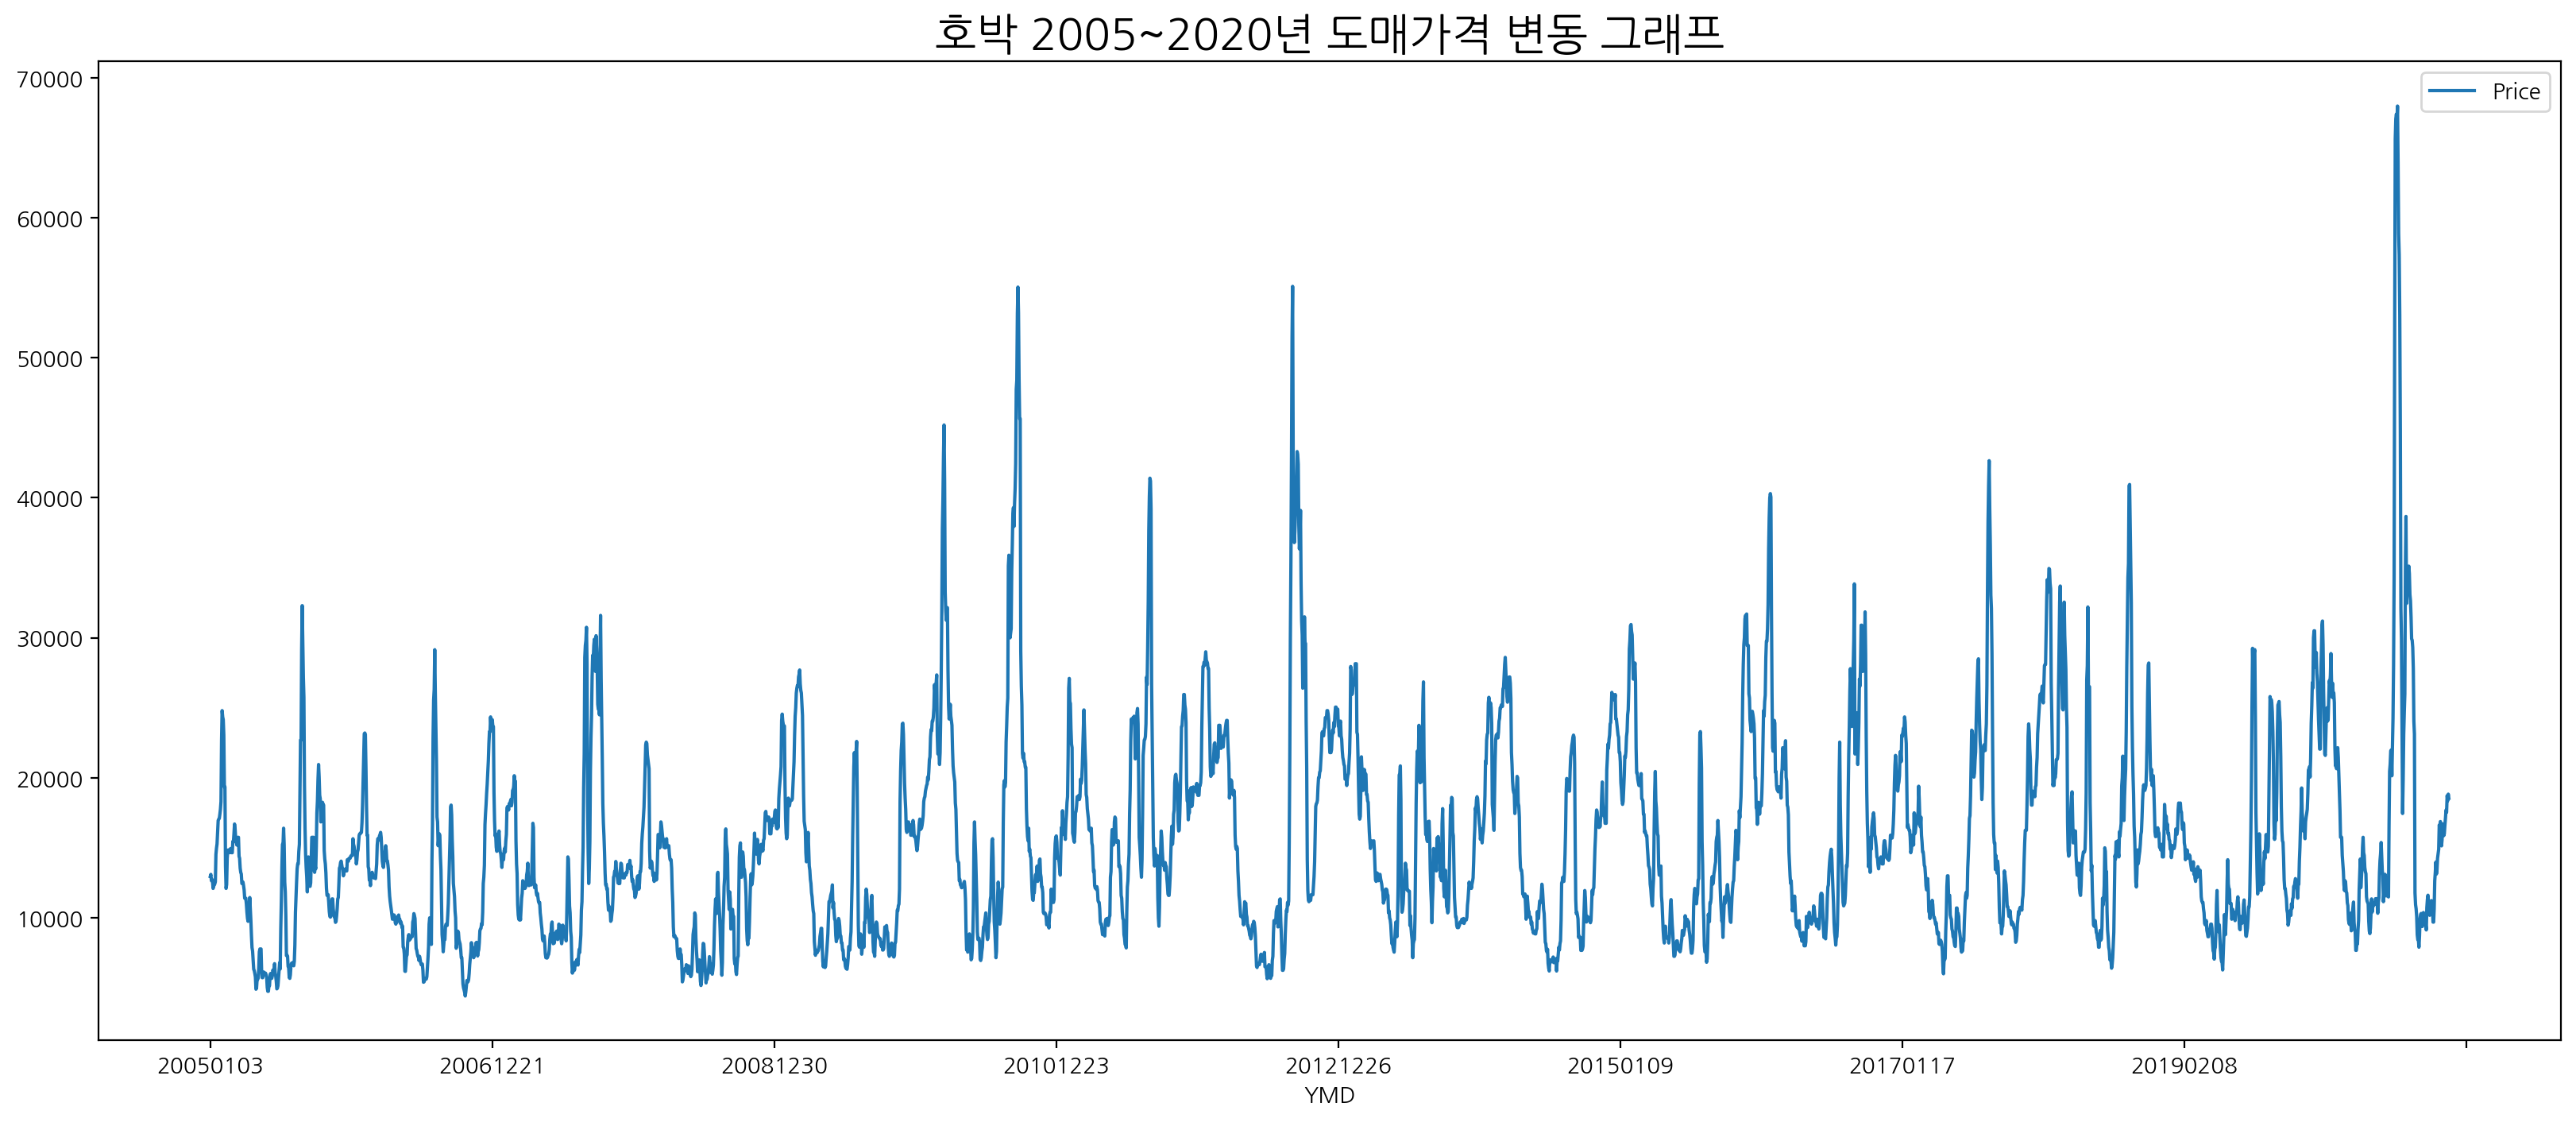

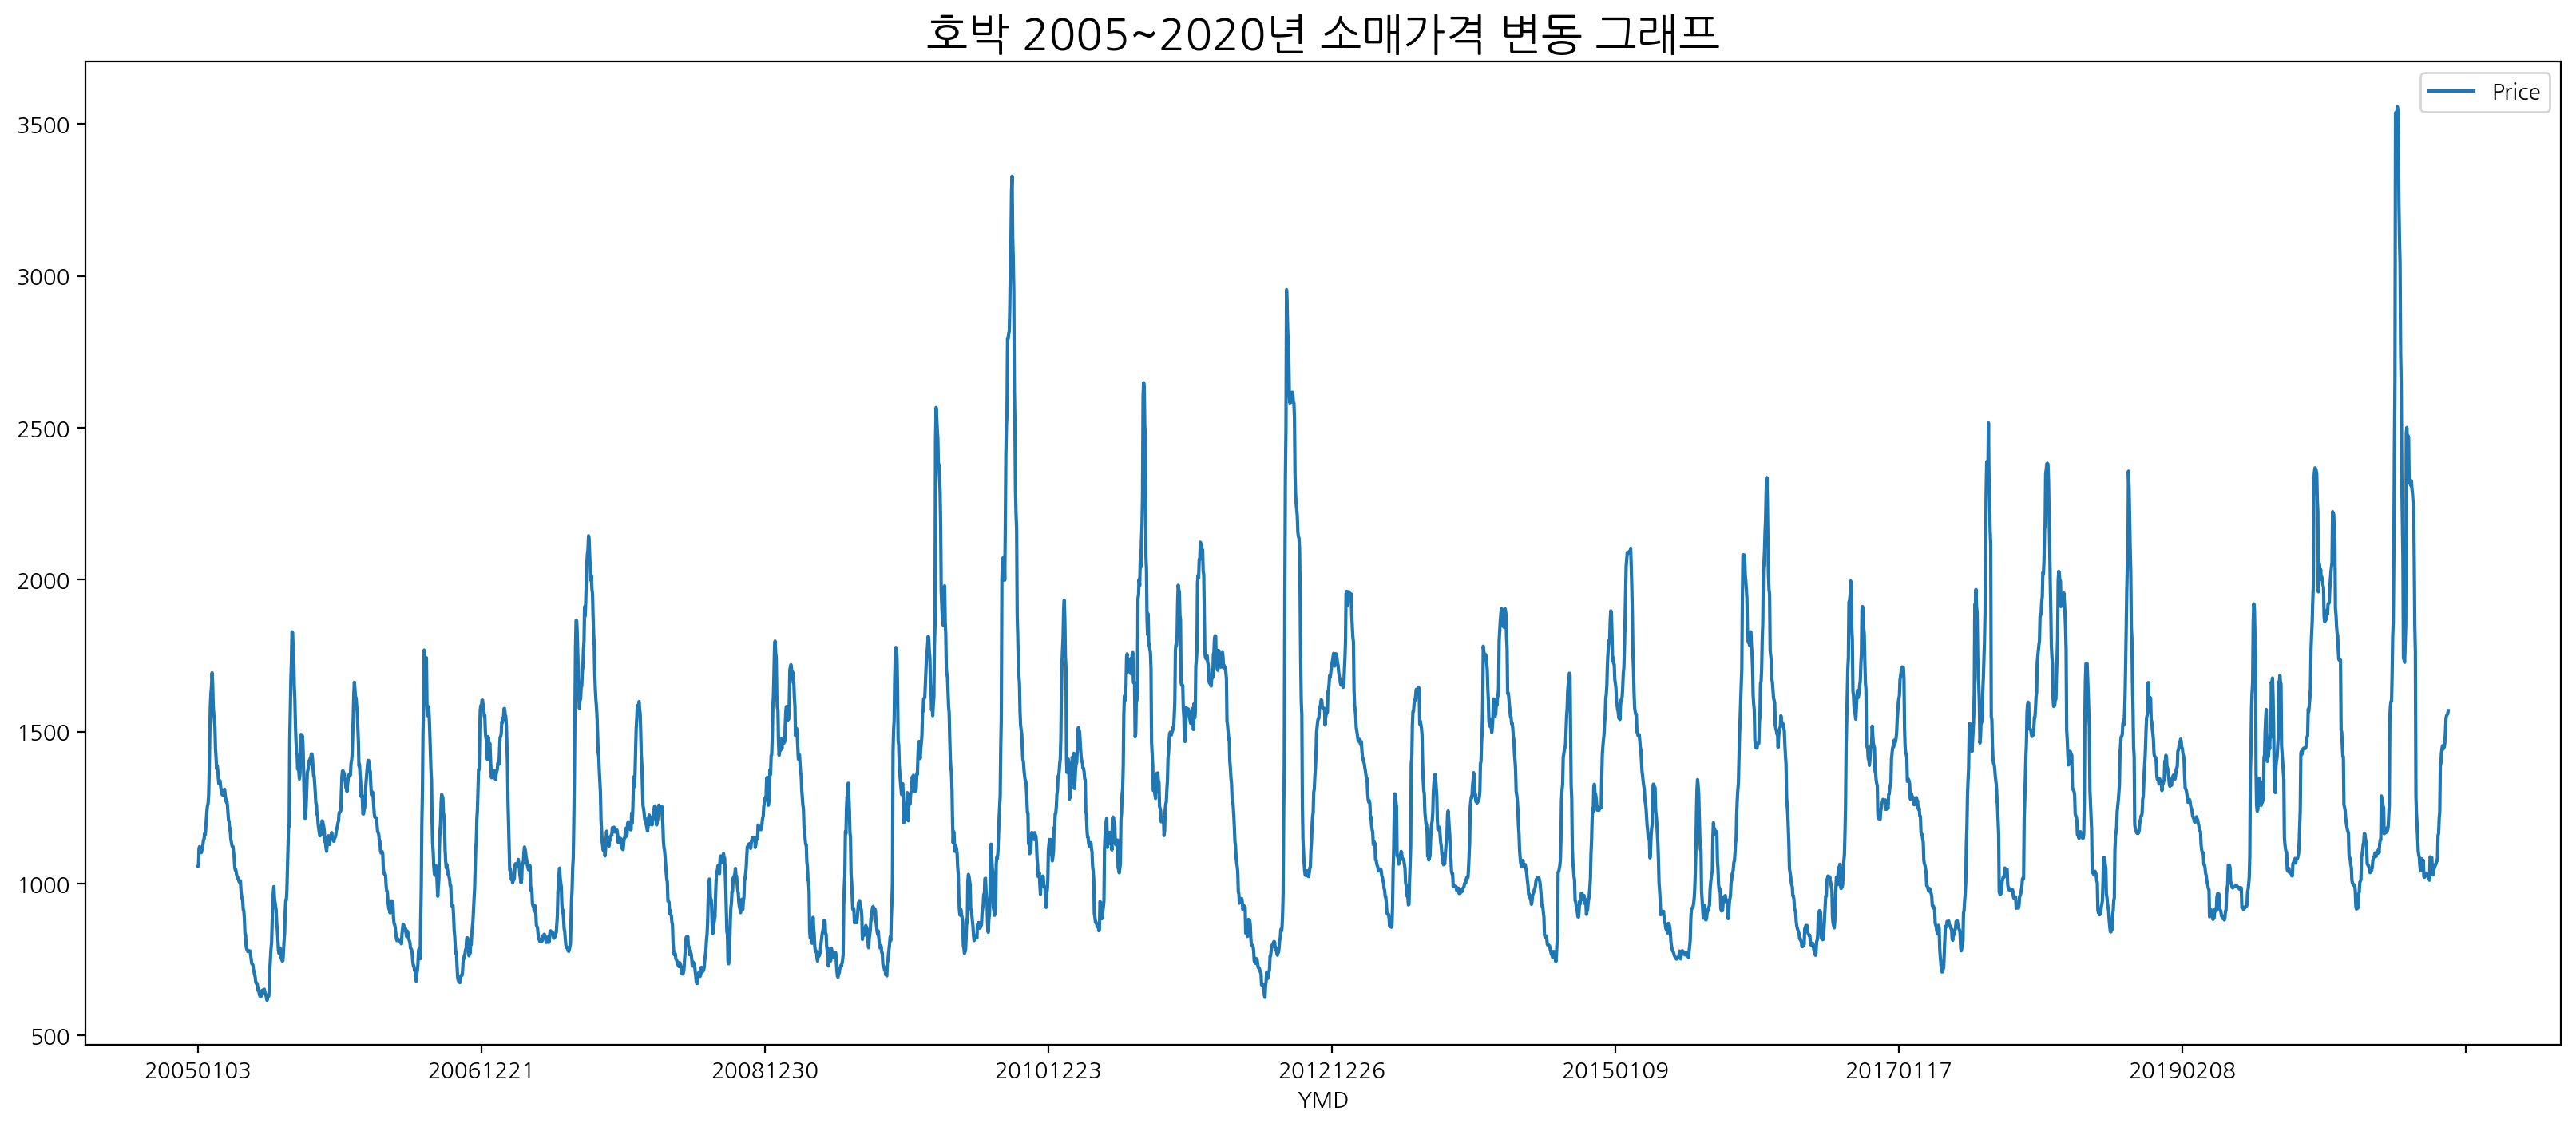

In [213]:
AgriMarket_EDA("호박", (2005, 2020))

# 시각화

In [225]:
def AgriMarket_viz(product:str, year:tuple) -> None:

    # input
    # product = input('품목을 입력하세요. : ')
    # start = int(input('시작 연도를 입력하세요. (4자리) : '))
    # end = int(input('끝 연도를 입력하세요. (4자리) : '))
    # print()
    start = year[0]
    end = year[1]
    
    
    if product not in product_w:
        print('해당 제품의 도매 거래내역이 없습니다.')
    
    elif ((min(df_gw[df_gw['Product']==product]['Y']) > end) | (max(df_gw[df_gw['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 도매 거래내역이 없습니다.')  
    
    else:
        df_gw[(df_gw['Product']==product) & (df_gw['Y'] >= start) & (df_gw['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 도매가격 변동 그래프', fontsize=20)

    
    if product not in product_r:
        print('해당 제품의 소매 거래내역이 없습니다.')
    
    elif ((min(df_gr[df_gr['Product']==product]['Y']) > end) | (max(df_gr[df_gr['Product']==product]['Y']) < start)):
        print('해당 일자에 제품의 소매 거래내역이 없습니다.')
        
    else:
        df_gr[(df_gr['Product']==product) & (df_gr['Y'] >= start) & (df_gr['Y'] <= end)].groupby(['MD'])[['Price']].mean().plot(figsize=(20,8))
        plt.title(f'{product} {start}~{end}년 소매가격 변동 그래프', fontsize=20)

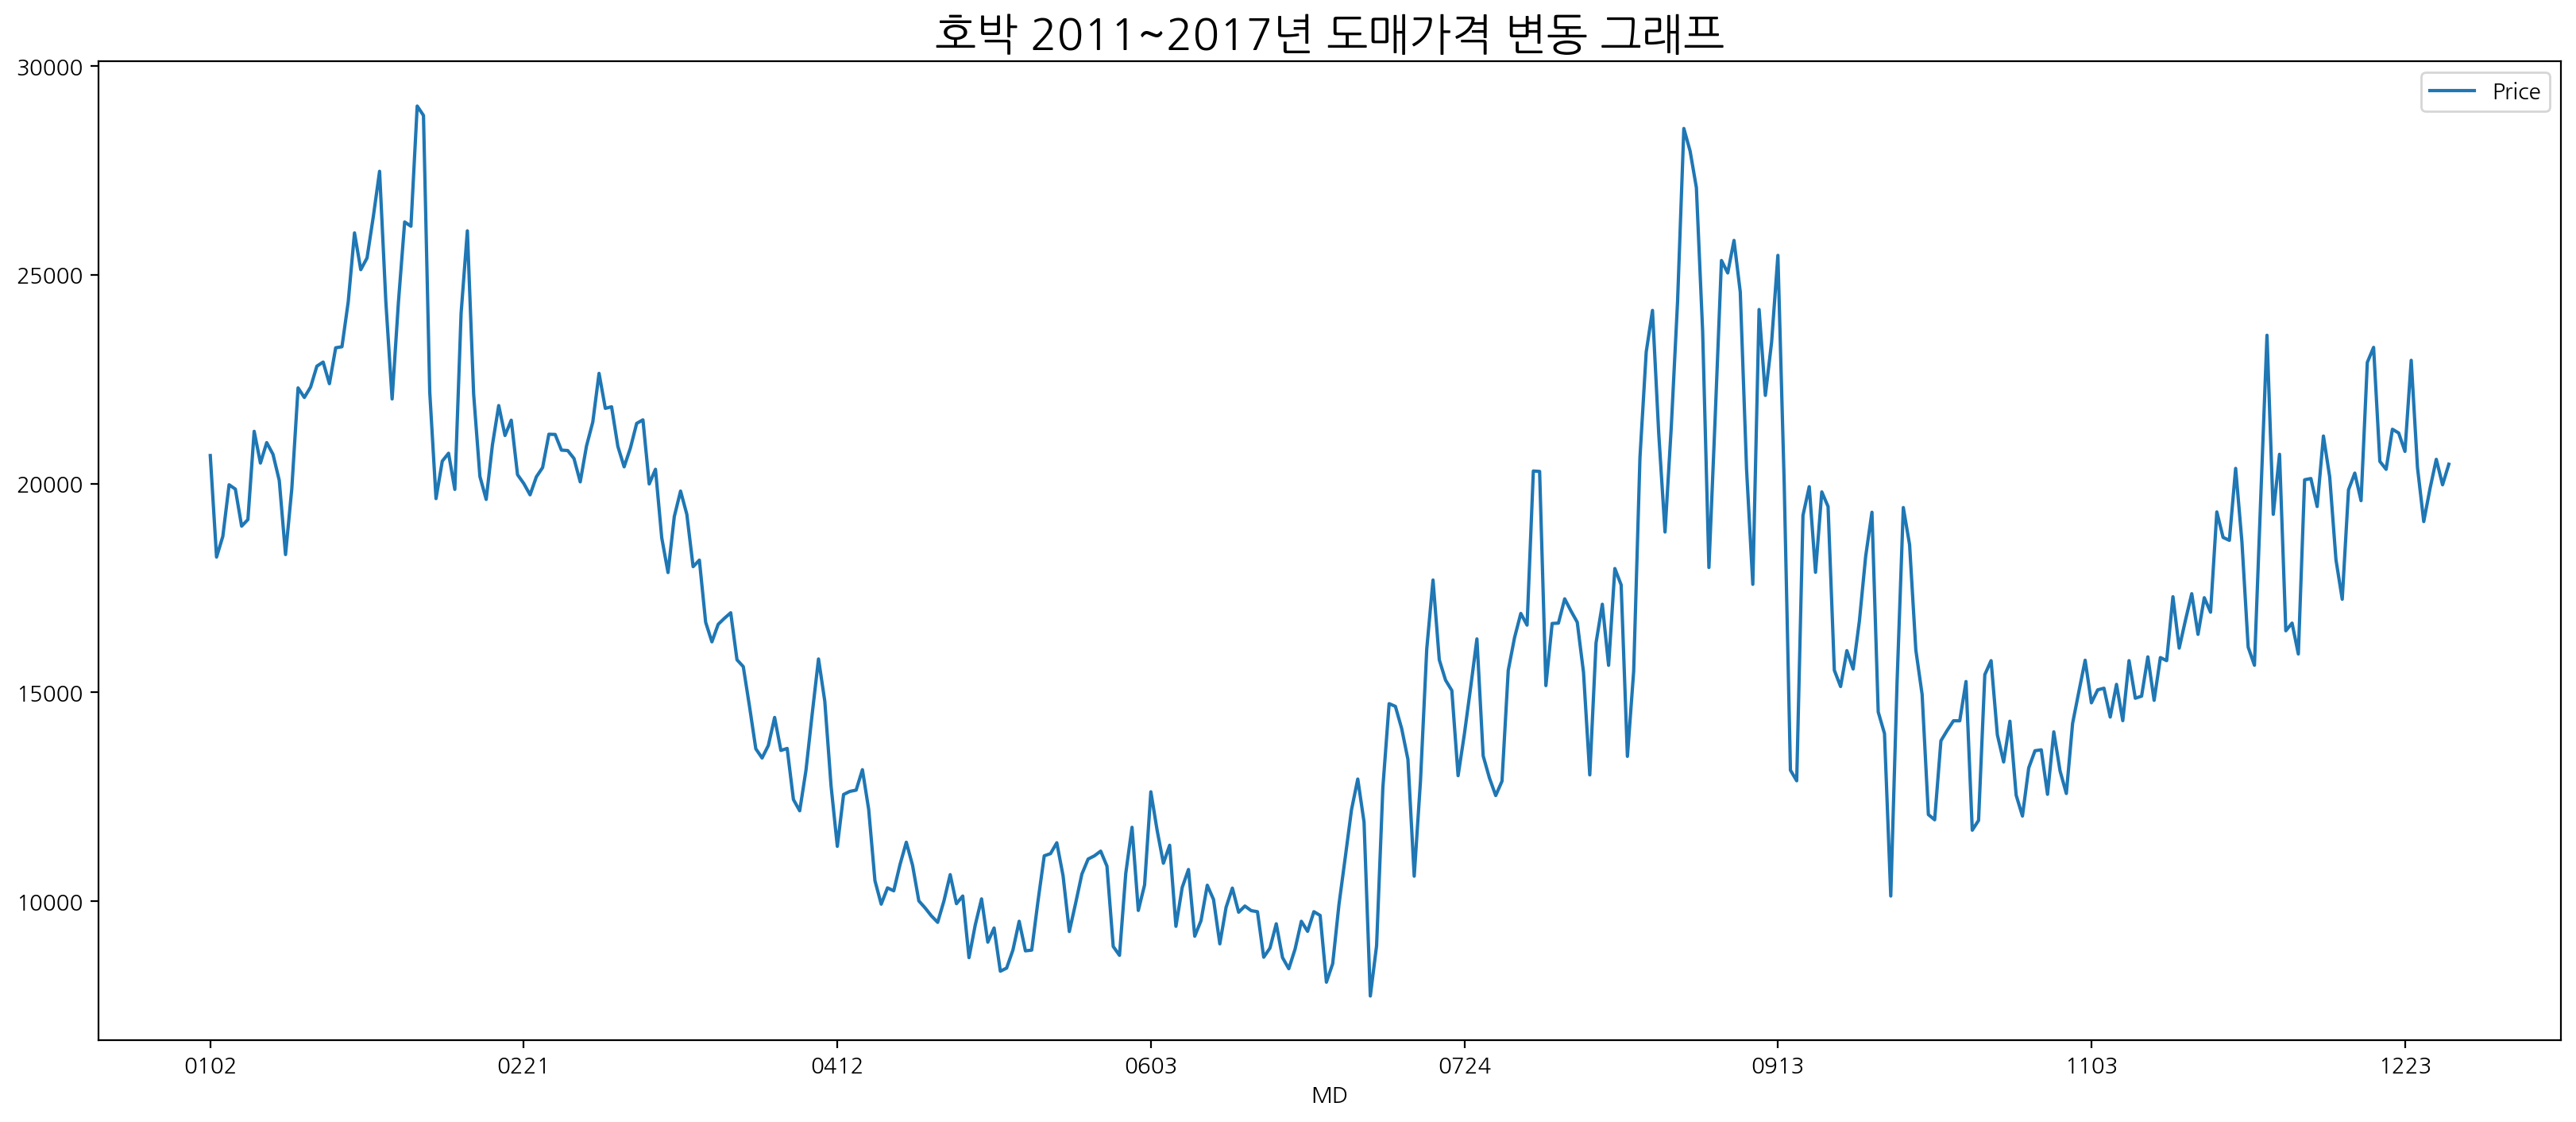

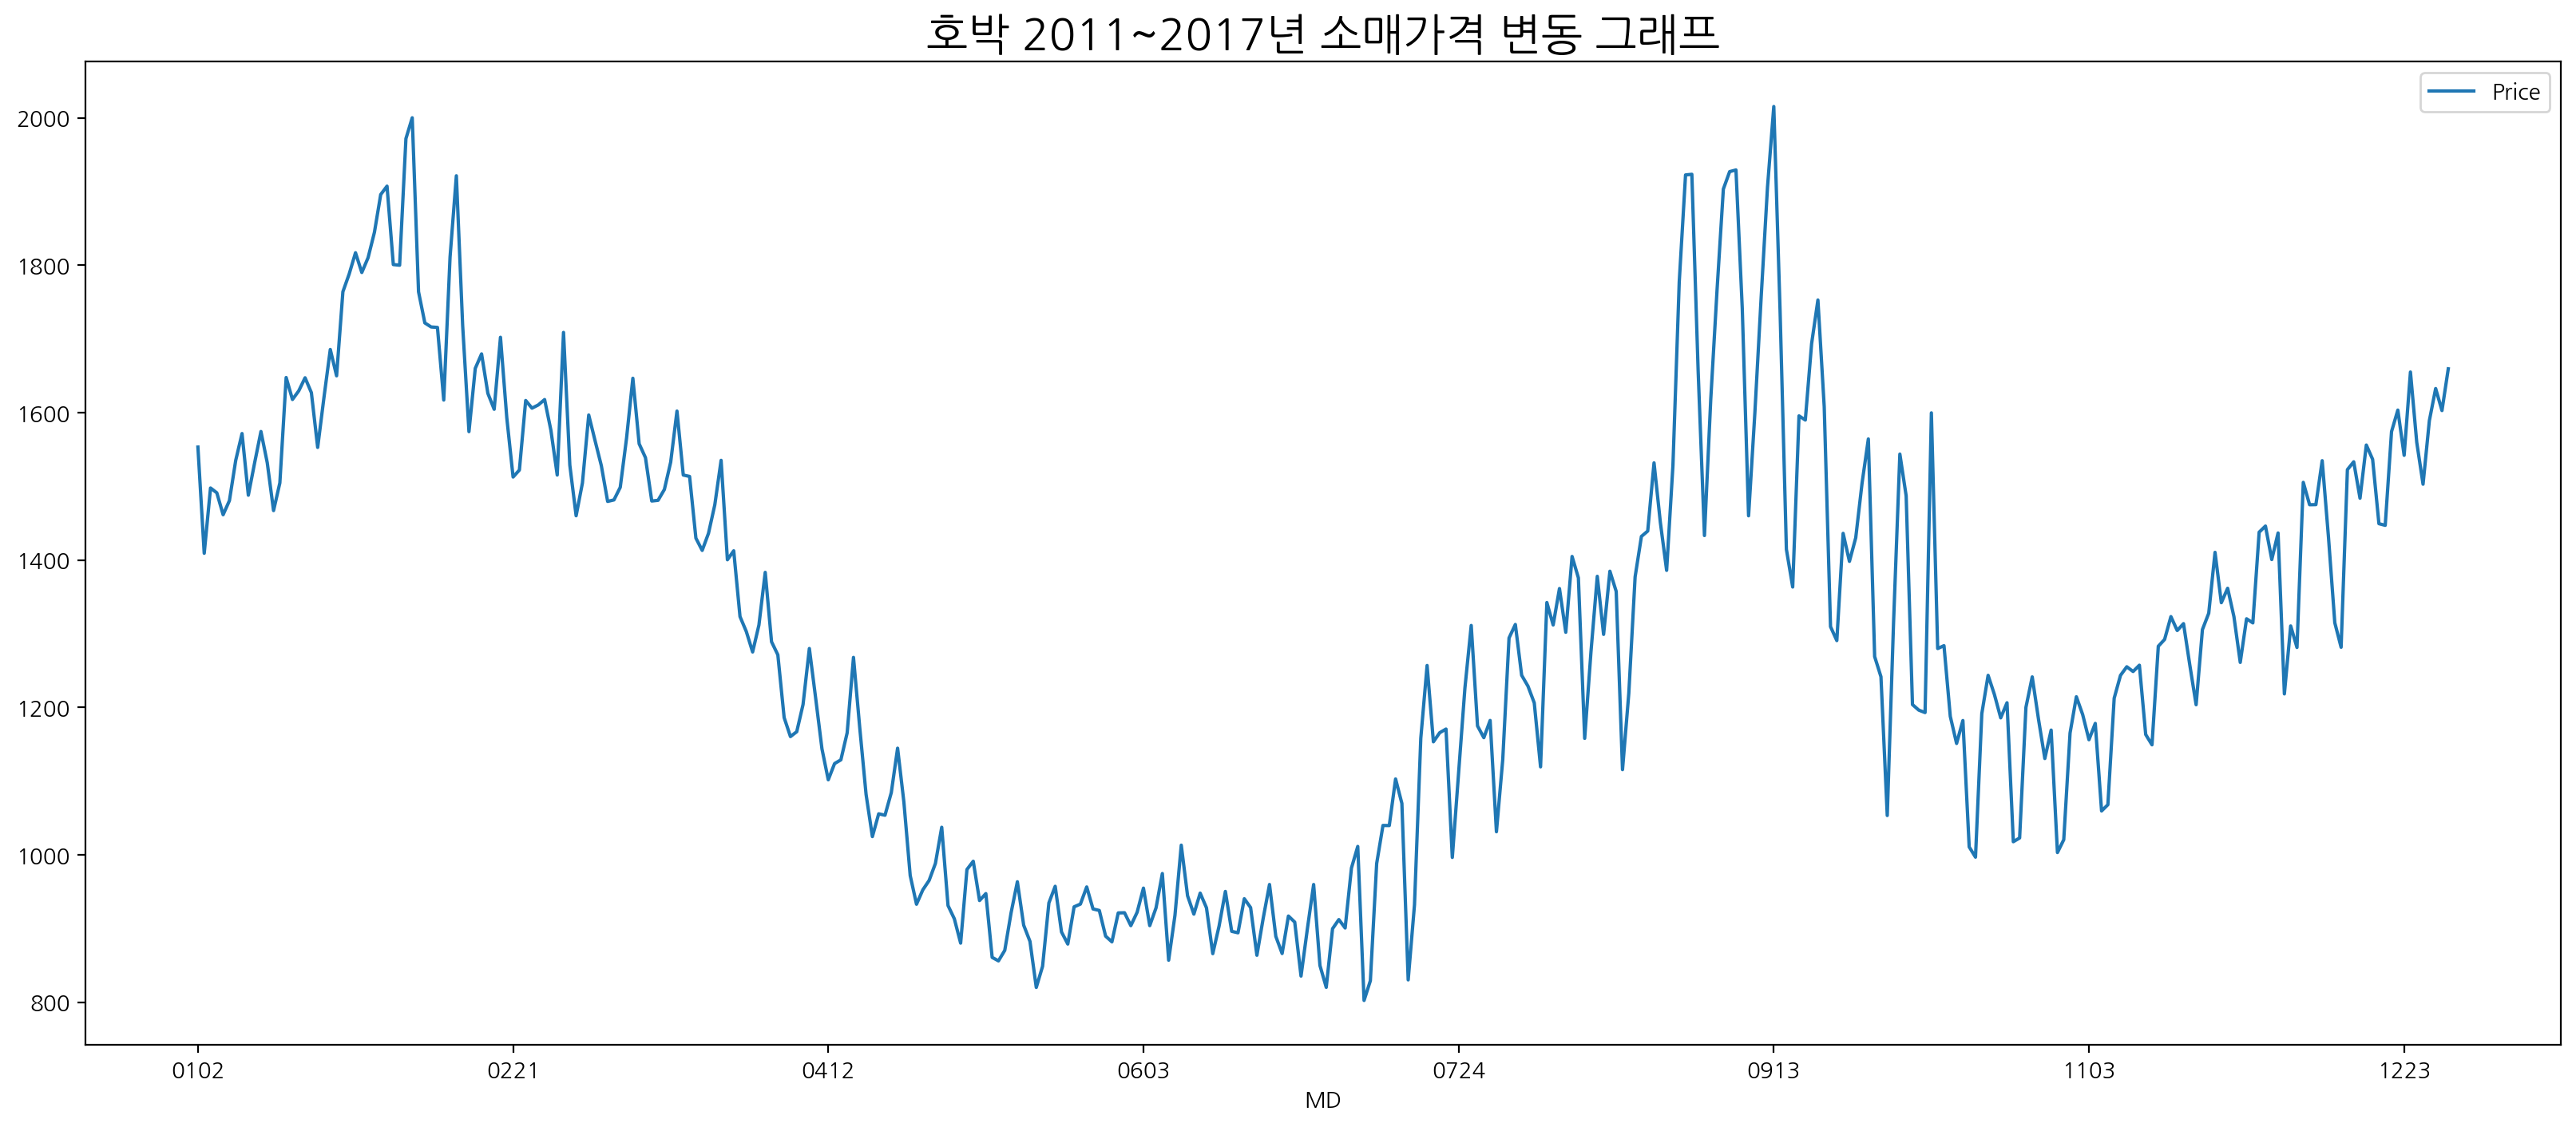

In [231]:
AgriMarket_viz("호박", (2011, 2017))